In [13]:
import AYD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import statsmodels.api as sm
import seaborn as sns

### conexiones
import sys
sys.path.insert(0, "/home/jupyter")

%time
import ciphered_connections as connections
import getpass
from datetime import datetime

# path = getpass.getpass("PATH: ")
# key = getpass.getpass("KEY:  ")
# iv = getpass.getpass("IV:   ")

path = "/home/jupyter/ciphered_connections/000543781.dta"
key = "50bb801fa81378a538654b2b7076b223"
iv = "9029080389AF47F5"


# path: /home/jupyter/ciphered_connections/000543781.dta  
# key: 50bb801fa81378a538654b2b7076b223
# iv: 9029080389AF47F5

%time

conexion_bq = connections.BigQueryConnection(
    path_token = path, key = key, 
    iv = iv)
datetime_str = datetime.now().strftime("%Y%m%d%H%M%S")
table = "DATAMART.gcs_tabla_tiger_{0}".format(datetime_str)
bucket_object = "gcs_file_tiger_{0}_*.csv".format(datetime_str)
bucket_name = 'nbamasmovil'

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 112 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.82 µs


In [14]:
# Descarga de tablón
query_decil = '''
    SELECT *                                  
    FROM  `bi-data-science-pilots.DESARROLLO.000_ajuste`
    where Decil < 3
        '''
TABLON_decil = conexion_bq.download_table_bq_gcs(query_decil,
    tabla_tmp = table, bucket_name = bucket_name,
    tmp_object = bucket_object)

TABLON_decil


Query results loaded to table /projects/bi-data-science-pilots/datasets/DATAMART/tables/gcs_tabla_tiger_20201124113316
Exported DATAMART.gcs_tabla_tiger_20201124113316 to gs://nbamasmovil/gcs_file_tiger_20201124113316_*.csv
Ejecutando la query:
 drop table `bi-data-science-pilots.DATAMART.gcs_tabla_tiger_20201124113316` ...

Query ejecutada correctamente


,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,FACTURACION_MEDIA_USO,FACTURACION_USO,INCR_PORCENTUAL_USO,VARIACION_ABSOLUTA_USO,SEG_proceso,SEG_Calidad,SEG_Heavy_Callers,SEG_Wrong_Tariff,SEG_Competitors,SEGMENTO_CHURN_1P
0,2020,6,202006,YOIGO,7309901,2016-04-04,NaN,0,0,0,...,9.090000,9.09,0.000000,0.000000,1,1,0,1,0,1_PROCESS ISSUE
1,2020,6,202006,YOIGO,9123234,2020-05-20,NaN,0,0,0,...,NaN,NaN,99999.000000,NaN,0,1,0,1,0,2_TECHNICAL PROBLEMS
2,2020,6,202006,YOIGO,6500155,2015-01-08,NaN,0,0,0,...,2.000000,2.00,0.000000,0.000000,0,1,0,0,1,2_TECHNICAL PROBLEMS
3,2020,6,202006,YOIGO,9006341,2019-12-16,NaN,0,0,0,...,61.980000,51.65,-0.166667,-10.330000,0,1,0,1,1,2_TECHNICAL PROBLEMS
4,2020,6,202006,YOIGO,9152434,2020-06-23,NaN,0,1,0,...,NaN,NaN,99999.000000,NaN,0,1,0,1,0,2_TECHNICAL PROBLEMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56762,2020,6,202006,YOIGO,2395144,2010-10-14,2020-03-11,4,1,1,...,34.286667,25.98,-0.242271,-8.306667,1,1,0,1,0,1_PROCESS ISSUE
56763,2020,6,202006,YOIGO,1639193,2010-01-14,2015-08-31,3,0,0,...,29.446667,23.14,-0.214173,-6.306667,0,0,0,1,1,4_WRONG TARIFF
56764,2020,6,202006,YOIGO,2799224,2011-03-16,2020-06-17,3,2,1,...,61.756667,61.31,-0.007233,-0.446667,1,0,1,1,0,1_PROCESS ISSUE
56765,2020,6,202006,YOIGO,3866082,2012-02-07,2019-02-14,2,0,0,...,30.036667,27.27,-0.092110,-2.766667,0,1,0,1,0,2_TECHNICAL PROBLEMS


In [15]:
df=TABLON_decil.copy()
df

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,FACTURACION_MEDIA_USO,FACTURACION_USO,INCR_PORCENTUAL_USO,VARIACION_ABSOLUTA_USO,SEG_proceso,SEG_Calidad,SEG_Heavy_Callers,SEG_Wrong_Tariff,SEG_Competitors,SEGMENTO_CHURN_1P
0,2020,6,202006,YOIGO,7309901,2016-04-04,NaN,0,0,0,...,9.090000,9.09,0.000000,0.000000,1,1,0,1,0,1_PROCESS ISSUE
1,2020,6,202006,YOIGO,9123234,2020-05-20,NaN,0,0,0,...,NaN,NaN,99999.000000,NaN,0,1,0,1,0,2_TECHNICAL PROBLEMS
2,2020,6,202006,YOIGO,6500155,2015-01-08,NaN,0,0,0,...,2.000000,2.00,0.000000,0.000000,0,1,0,0,1,2_TECHNICAL PROBLEMS
3,2020,6,202006,YOIGO,9006341,2019-12-16,NaN,0,0,0,...,61.980000,51.65,-0.166667,-10.330000,0,1,0,1,1,2_TECHNICAL PROBLEMS
4,2020,6,202006,YOIGO,9152434,2020-06-23,NaN,0,1,0,...,NaN,NaN,99999.000000,NaN,0,1,0,1,0,2_TECHNICAL PROBLEMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56762,2020,6,202006,YOIGO,2395144,2010-10-14,2020-03-11,4,1,1,...,34.286667,25.98,-0.242271,-8.306667,1,1,0,1,0,1_PROCESS ISSUE
56763,2020,6,202006,YOIGO,1639193,2010-01-14,2015-08-31,3,0,0,...,29.446667,23.14,-0.214173,-6.306667,0,0,0,1,1,4_WRONG TARIFF
56764,2020,6,202006,YOIGO,2799224,2011-03-16,2020-06-17,3,2,1,...,61.756667,61.31,-0.007233,-0.446667,1,0,1,1,0,1_PROCESS ISSUE
56765,2020,6,202006,YOIGO,3866082,2012-02-07,2019-02-14,2,0,0,...,30.036667,27.27,-0.092110,-2.766667,0,1,0,1,0,2_TECHNICAL PROBLEMS


In [16]:
# tratamiento de valores ausentes 

# Imputación de valores perdidos sobre el tablon con todos los registros

df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
df.isnull().values.any()

False

In [17]:
import pandas as pd 
import numpy as np

In [18]:
def verificar(var):
    variables_TOTAL=pd.DataFrame(list(df.columns.values)) 
    variables_TOTAL[['Variables']]=variables_TOTAL[[0]]
    validar=list(variables_TOTAL[variables_TOTAL['Variables'].str.contains(var,case=False)]['Variables']) 
    return validar

verificar("drop")   

['FRIENDS_IS_CHURN_YOI',
 'FRIENDS_IS_CHURN_MAS',
 'FRIENDS_IS_CHURN_PEP',
 'FRIENDS_IS_CHURN_GMM']

In [19]:
# Se define correlacion entre variables partiendo de una muestra.
# definimos una pequeña muestra
# ===============================================
df_muestra=df.sample(n=10000, random_state=1)
df_muestra

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,FACTURACION_MEDIA_USO,FACTURACION_USO,INCR_PORCENTUAL_USO,VARIACION_ABSOLUTA_USO,SEG_proceso,SEG_Calidad,SEG_Heavy_Callers,SEG_Wrong_Tariff,SEG_Competitors,SEGMENTO_CHURN_1P
12690,2020,6,202006,YOIGO,8796029,2019-06-06,.,2,0,0,...,11.570000,11.67,0.008643,0.100000,0,0,0,1,0,4_WRONG TARIFF
19786,2020,6,202006,YOIGO,8403489,2018-07-04,.,1,0,0,...,11.570000,11.57,0.000000,0.000000,0,0,0,1,0,4_WRONG TARIFF
53564,2020,6,202006,YOIGO,3316128,2011-08-11,2016-12-23,4,0,0,...,15.700000,15.70,0.000000,0.000000,0,0,0,0,1,6_COMPETITORS
38797,2020,6,202006,YOIGO,8656064,2019-01-25,.,1,0,0,...,29.093333,53.66,0.844409,24.566667,0,1,0,1,0,2_TECHNICAL PROBLEMS
31660,2020,6,202006,YOIGO,3802303,2012-01-18,2017-11-02,2,1,0,...,10.580000,11.77,0.112476,1.190000,0,0,0,1,1,4_WRONG TARIFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48078,2020,6,202006,YOIGO,7380185,2016-06-01,2017-06-30,2,0,0,...,15.700000,15.70,0.000000,0.000000,0,0,0,0,1,6_COMPETITORS
51384,2020,6,202006,YOIGO,2729674,2011-02-12,2014-03-05,3,0,0,...,11.570000,11.57,0.000000,0.000000,0,0,0,1,1,4_WRONG TARIFF
11947,2020,6,202006,YOIGO,8423078,2018-07-23,.,0,0,0,...,21.490000,24.56,0.142857,3.070000,0,1,0,1,0,2_TECHNICAL PROBLEMS
50622,2020,6,202006,YOIGO,1177537,2017-11-16,.,1,0,0,...,20.693333,20.66,-0.001611,-0.033333,0,0,0,1,0,4_WRONG TARIFF


In [10]:
X=df[
    
          [
              
               'NUM_MONTH_BAD_THR_QOE_MOBI_6M',
               'AVG_THR_QOE_MOBI',
              'NUM_LLAMADAS_NETWORK',
              'IS_DETERIORED_1M_AVG_THR_QOE_MOBI',
              'Mobile_Red_Incidences'
##  'AVG_DL_PEAK_THR_KBPS_MOBI', 
#  'AVG_KPI_PERC_CSS_MOBI',
              
# #  'IS_DETERIORED_3M_AVG_KPI_QOE_MOBI',
#  'IS_IMPROVED_1M_AVG_KPI_QOE_MOBI',
# #  'IS_IMPROVED_3M_AVG_KPI_QOE_MOBI',
#  'IS_SAME_1M_AVG_THR_QOE_MOBI',
# #  'IS_SAME_3M_AVG_THR_QOE_MOBI',
              
# #  'NUM_FRIENDS',
# #  'NUM_GB_2G_CURR',
# #  'NUM_GB_2G_NATR_CURR',
# #  'NUM_GB_3G_CURR',
# #  'NUM_GB_3G_NATR_CURR',
# #  'NUM_GB_3G_RAAS_CURR',
# #  'NUM_LINE_KPI_QOE_MOBI',
#  # NUEVO 'NUM_LINE_THR_QOE_MOBI',

# #  'NUM_NETW_TMEN_CURR',
#  'NUM_THR_QOE_MOBI_1',
#  'NUM_THR_QOE_MOBI_5',
# #  'PERC_GB_3G_ALLN_CURR',
# #  'PERC_GB_2G_NATR_CURR',
# # #               'PERC_GB_2G_OWNN_CURR',
# #  'PERC_GB_3G_NATR_CURR',
# #  'PERC_GB_3G_OWNN_CURR',
# #  'PERC_GB_4G_NATR_CURR',
# #  'PERC_GB_4G_OWNN_CURR',
# # #  'PERC_GB_NATR_ALLN_CURR',
# #  'PERC_GB_NATR_CURR',
# # #  'PERC_SESS_NATR_ALLN_CURR',
# #  'PERC_SESS_NATR_CURR',
#  'PROBLEMAS_TECNICOS',
#  'low_signal',
#  'total_jiras_cc'   
    
          ]]


Y=df[['fuga_real']].astype(str)


Total de registros en el DF original: 170654
Porcentaje en  train respecto al original: 0.7999988280380185
Porcentaje en  test respecto al original: 0.20000117196198156


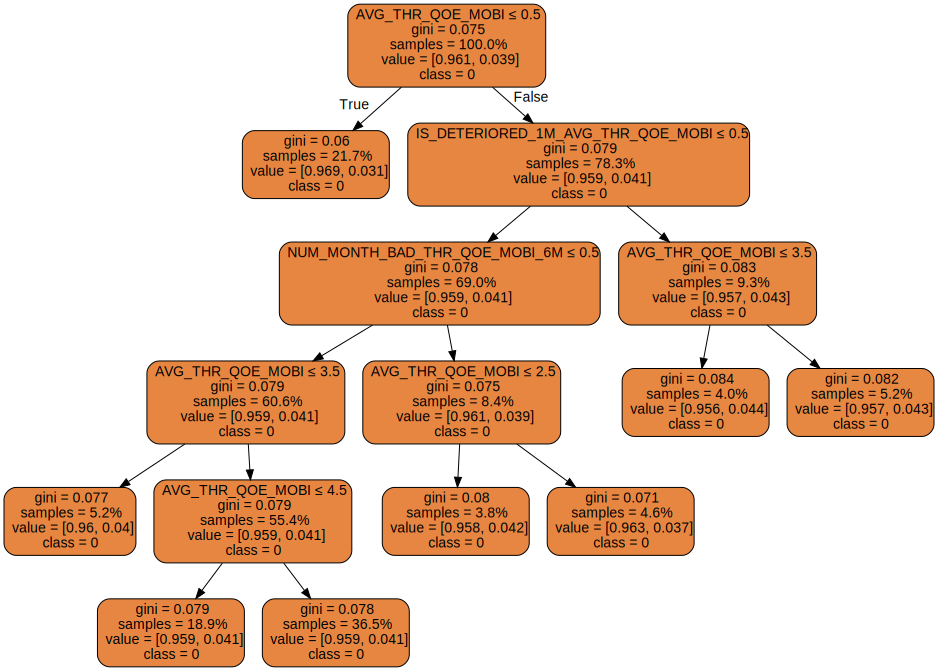

In [11]:

# Realizamos el train test split
# ======================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

n = len(X)
print("Total de registros en el DF original: {}".format(n))
print("Porcentaje en  train respecto al original: {}".format(1.0 * len(X_train) / n))
print("Porcentaje en  test respecto al original: {}".format(1.0 * len(X_test) / n))

from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Indice de gini para arbol de decisión
# ======================================================# Dibujamos arbol


import graphviz 
from sklearn import tree
import graphviz 
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=3000) 

#clf=clf_entropy.fit(X_train, Y_train)
clf=clf_gini.fit(X_train, Y_train)
np.unique(Y_train) # valores target deben de ser tipo caracter

dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,   proportion = True,
                         special_characters=True)
graph = graphviz.Source(dot_data)

# #Para exportarlo a pdf graph.render("Arbol")
graph

Total de registros en el DF original: 170654
Porcentaje en  train respecto al original: 0.7999988280380185
Porcentaje en  test respecto al original: 0.20000117196198156


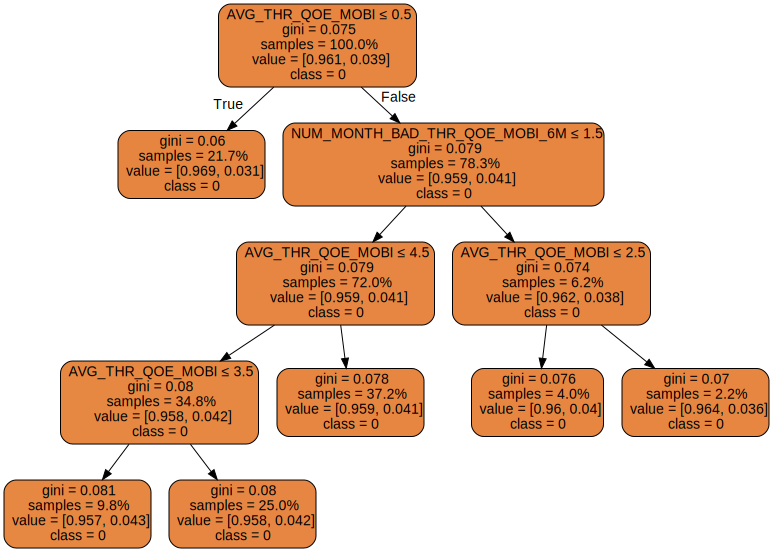

In [12]:
X=df[
    
          [
              
               'NUM_MONTH_BAD_THR_QOE_MOBI_6M',
               'AVG_THR_QOE_MOBI',
              'NUM_LLAMADAS_NETWORK',
              #'IS_DETERIORED_1M_AVG_THR_QOE_MOBI',
              'Mobile_Red_Incidences'
  
          ]]


Y=df[['fuga_real']].astype(str)



# Realizamos el train test split
# ======================================================
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

n = len(X)
print("Total de registros en el DF original: {}".format(n))
print("Porcentaje en  train respecto al original: {}".format(1.0 * len(X_train) / n))
print("Porcentaje en  test respecto al original: {}".format(1.0 * len(X_test) / n))

from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Indice de gini para arbol de decisión
# ======================================================# Dibujamos arbol


import graphviz 
from sklearn import tree
import graphviz 
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion = "gini",min_samples_leaf=3000) 

#clf=clf_entropy.fit(X_train, Y_train)
clf=clf_gini.fit(X_train, Y_train)
np.unique(Y_train) # valores target deben de ser tipo caracter

dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = X_train.columns,
                                class_names = np.unique(Y_train),
                                filled=True,  rounded=True,   proportion = True,
                         special_characters=True)
graph = graphviz.Source(dot_data)

# #Para exportarlo a pdf graph.render("Arbol")
graph